# Statistical learning: the setting and the estimator object in scikit-learn

## Datasets

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

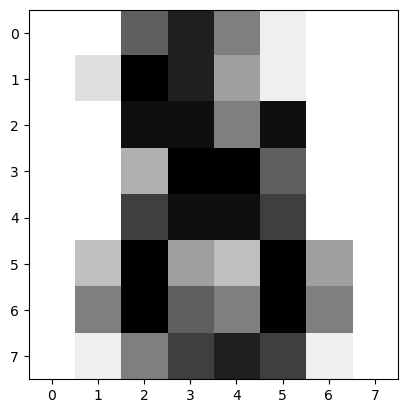

In [3]:
digits = datasets.load_digits()
digits.images.shape
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],
           cmap=plt.cm.gray_r)

In [4]:
data = digits.images.reshape(
    (digits.images.shape[0], -1)
)
data.shape

(1797, 64)

### Estimators objects

```python
estimator.fit(data)
estimator = Estimator(param1=1, param2=2)
estimator.param1
estimator.estimated_param_ 
```

## Supervised learning: predicting an output variable from high-dimensional observations

### Nearest neighbor and the curse of dimensionality

In [5]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

#### k-Nearest neighbors classifier

In [6]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
knn.predict(iris_X_test)
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear model: from regression to sparsity

In [7]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

#### Linear regression

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_) 


# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


0.585085427447195

#### Shrinkage

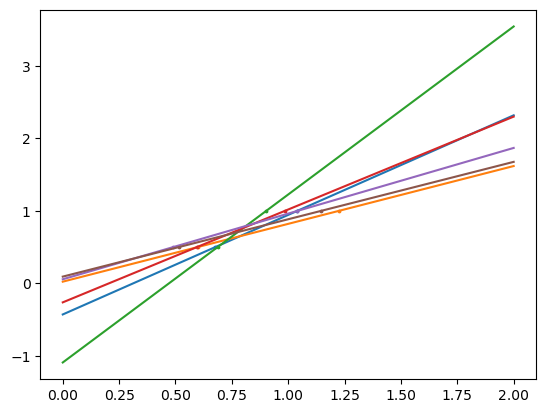

In [9]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

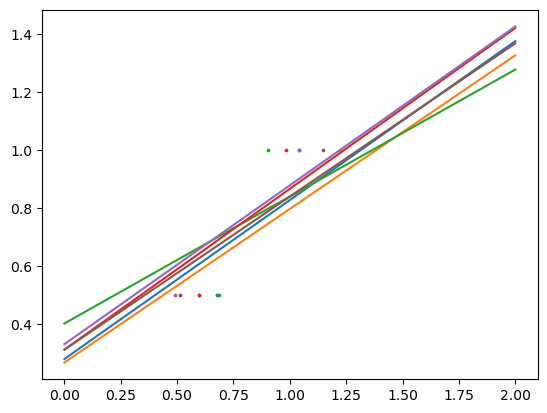

In [11]:
regr = linear_model.Ridge(alpha=.1)

plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    #print(this_X)
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [12]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851211547549662, 0.5852172781570948, 0.5854773661274462, 0.5855599854998634, 0.583079520872396, 0.5705970628037382]


#### Sparsity

In [13]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[   0.         -212.4341158   517.20105983  313.77231942 -160.82780155
   -0.         -187.19532359   69.38062294  508.65764425   71.8438046 ]


### Classification

In [14]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

##### Exercise

In [28]:
from sklearn import datasets, linear_model, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()
#dataset=[X_digits, y_digits]

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.1, train_size=0.9, random_state=0, shuffle=True, stratify=None)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test,y_test))
#predicted_labels_regr = regr.predict(X_test)
#print(mean_squared_error(y_test, predicted_labels_regr))
#print(predicted_labels)
#print(accuracy_score(y_test, predicted_labels))
nn = neighbors.KNeighborsClassifier()
nbrs = nn.fit(X_train, y_train)
print(nbrs.score(X_test,y_test))
predicted_labels_nn = nn.predict(X_test)
#print(predicted_labels_nn)
print(accuracy_score(y_test, predicted_labels_nn))


# print("KNN score: %f" % knn.fit(X_train, y_train).score(X_test, y_test))
# print(
#     "LogisticRegression score: %f"
#     % logistic.fit(X_train, y_train).score(X_test, y_test)
# )

0.5603712374602332
0.9722222222222222
0.9722222222222222


### Suppoty Vector Machines

#### Linear SVMs

In [29]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

#### Different kernels

In [ ]:
svc = svm.SVC(kernel='linear')
svc = svm.SVC(kernel='poly',
              degree=3)
# degree: polynomial degree
svc = svm.SVC(kernel='rbf')
# gamma: inverse of size of
# radial kernel
svc = svm.SVC(kernel='sigmoid')

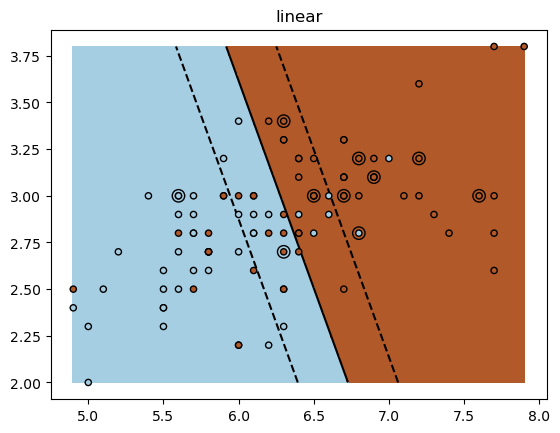

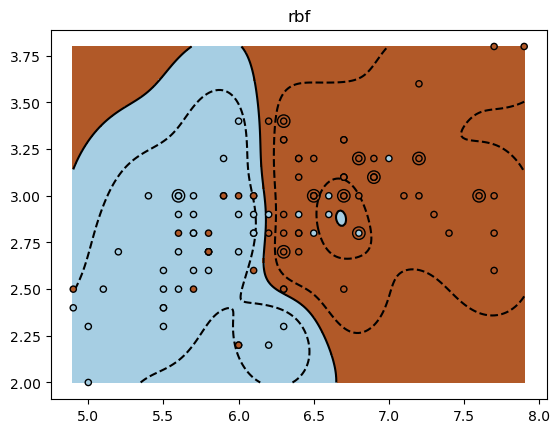

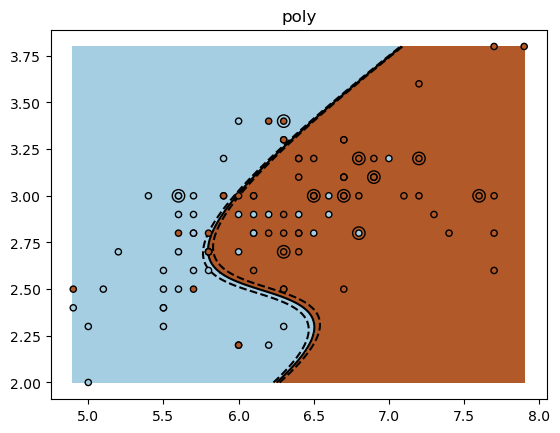

In [31]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=0, shuffle=True, stratify=None)

for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

## Model selection: choosing estimators and their parameters


In [32]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [33]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [38]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

print(cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1))
print(cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro'))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]
[0.96388889 0.92222222 0.9637883  0.9637883  0.93036212]
[0.96578289 0.92708922 0.96681476 0.96362897 0.93192644]


#### Exercise

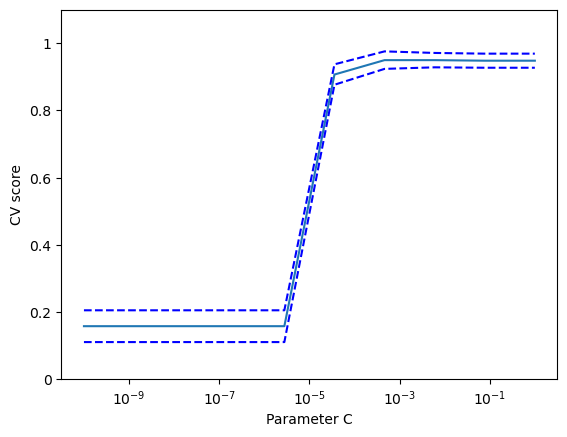

In [43]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score
X, y = datasets.load_digits(return_X_y=True)
svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std = list()

# for train_indices, test_indices in k_fold.split(X):
#     #print('Train: %s | test: %s' % (train_indices, test_indices))
#     scores.append(svc.fit(X[train_indices], y[train_indices]).score(X[test_indices],y[test_indices]))

# #print(scores)
# print(cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1))
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

### Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])        
print(clf.best_score_)                                  
print(clf.best_estimator_.C)                            

# Prediction performance on test set is not as good as on train set
print(clf.score(X_digits[1000:], y_digits[1000:]))      

cross_val_score(clf, X_digits, y_digits) 

0.95
0.0021544346900318843
0.946047678795483


array([0.94722222, 0.91666667, 0.96657382, 0.97493036, 0.93593315])

### Cross-validated estimators

In [47]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)
# The estimator chose automatically its lambda:
lasso.alpha_

0.003753767152691846

In [57]:
import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]
alphas = np.logspace(-6, -1, 10)
lasso = Lasso(random_state=0, max_iter=10000)
tuned_parameters = [{"alpha": alphas}]
clf = GridSearchCV(estimator=lasso, param_grid=tuned_parameters, cv=5)
clf.fit(X, y)        
print(clf.best_score_)                                  
print(clf.best_estimator_.alpha)     

0.43173342306823487
0.1


## Unsupervised learning: seeking representations of the data

### Clustering: grouping observations together

In [58]:
# Set the PRNG
import numpy as np
np.random.seed(1)

#### K-means clustering

In [59]:
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 2 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [65]:
import scipy as sp
try:
   face = sp.face(gray=True)
except AttributeError:
   from scipy import misc
   face = misc.face(gray=True)
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

/tmp/ipykernel_65096/2289052852.py:6: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


### Hierarchical agglomerative clustering: Ward
- Aims to build a hierarchy of clusters
- Agglomerative: bottom-up. Each observation starts in its own cluster. When the number of clusters is large it's more computationally efficient than kmeans.  
- Divisive: top-down. All observations start in one cluster. Slow and statistically ill-posed for a large number of clusters.
(This means though that you would need to know the clusters before?)

### Connectivity-constrained clustering

Basically use a graph to specify the samples that can be clustered together. (what is the points of this? - this is what you're doing with hcs clustering algorithm... hehe...)

In [66]:
from skimage.data import coins
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale
rescaled_coins = rescale(
    gaussian_filter(coins(), sigma=2),
    0.2, mode='reflect', anti_aliasing=False
)
X = np.reshape(rescaled_coins, (-1, 1))

In [67]:
from sklearn.feature_extraction import grid_to_graph
connectivity = grid_to_graph(*rescaled_coins.shape)

In [68]:
n_clusters = 27  # number of regions

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)

### Feature agglomeration
- Sparsity can be used to mitigate the curse of dimensionality (an insuffient amount of samples in relation to the amount of features)
- Another approach is to merge features together

In [69]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)

X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

Some estimators have a `transform` method that can, among other things, be used to reduce the dimensionality of the dataset. 

## Decompositions: from a signal to components and loadings
If X is our multivariate data, then the problem we are trying ro solve is to rewrite it on a different observational basis. We want to learn loadings, L and a set of components (such as principal components in PCA), C such that X = LC

#### Principal Component Analysis, PCA
Selects the successive components that explain the maximum variance in the signal. 

In [73]:
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=(100, 1))
x2 = np.random.normal(size=(100, 1))
x3 = x1 + x2
X = np.concatenate([x1, x2, x3], axis=1)

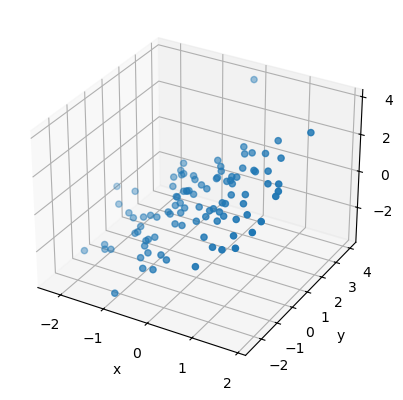

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
_ = ax.set(xlabel="x", ylabel="y", zlabel="z")

In [75]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)  

[3.38879962e+00 8.82253901e-01 1.01134868e-31]


In [76]:
pca.set_params(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

#### Independent Component Analysis: ICA
selects components so that the distribution of their loadings carries a maximum amount of indepedent information. It is able to recover non-Gaussian indepent signals. 

In [77]:
# Generate sample data
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

True

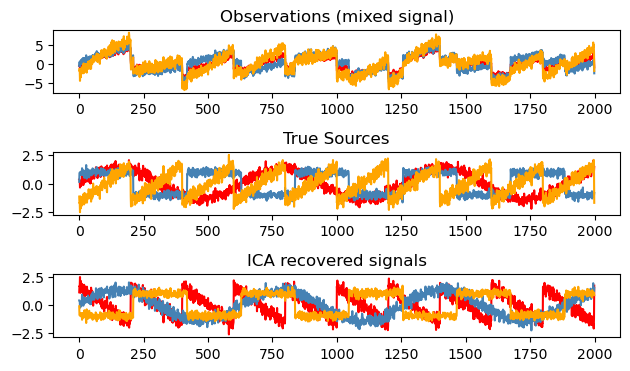

In [79]:
import matplotlib.pyplot as plt

plt.figure()

models = [X, S, S_]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

# Questions
1. Do you have any thoughts on when you need to do extensive hyperparameter tuning (with cross-validation or likewise) and when you can argue for using default parameters? 
2. The sklearn tutorial did not mention when it could be useful to go for a divisive clustering algorithm. Do you have any ideas? 
3. Not sure how specific we can be but figure 2.4 in XX does not make sense to me. It feels like the train/test curves should be the opposite? Wouldn't a low number of K lead to high bias and unability to cater to new unseen samples? 